#**1. Overview of Dataset**


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/spotify-2023.csv', encoding='latin-1')

# Display the first few rows of the dataset
df = df.rename(columns=lambda x: x.replace('_', ' ').capitalize())
df.head().style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightpink'), ('color', 'white'), ('text-align', 'center'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('background-color', 'pink'), ('color', 'black'), ('text-align', 'center'), ('border-right', '1px solid black')]},
    {'selector': 'th', 'props': [('border', '1px solid black')]},
  {'selector': 'tr', 'props': [('border-bottom', '1px solid black')]},
])

,Track name,Artist(s) name,Artist count,Released year,Released month,Released day,In spotify playlists,In spotify charts,Streams,In apple playlists,In apple charts,In deezer playlists,In deezer charts,In shazam charts,Bpm,Key,Mode,Danceability %,Valence %,Energy %,Acousticness %,Instrumentalness %,Liveness %,Speechiness %
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6



*   How many rows and columns does the dataset contain?




In [ ]:
import pandas as pd
from colorama import Fore, Back, Style

# Load the dataset
df = pd.read_csv('/spotify-2023.csv', encoding='latin-1')

# Get the number of rows and columns
num_rows = df.shape[0]
num_cols = df.shape[1]

# Print the results with boxing, magenta color (close to pink), and bold text
print(Fore.MAGENTA + Back.WHITE + Style.BRIGHT + "╔══════════════════════╗")
print(Fore.MAGENTA + Back.WHITE + Style.BRIGHT + "║ Data Set:            ║")
print(Fore.MAGENTA + Back.WHITE + Style.BRIGHT + f"║     - Rows: {num_rows}      ║")
print(Fore.MAGENTA + Back.WHITE + Style.BRIGHT + f"║     - Columns: {num_cols}    ║")
print(Fore.MAGENTA + Back.WHITE + Style.BRIGHT + "╚══════════════════════╝" + Style.RESET_ALL)

╔══════════════════════╗
║ Data Set:            ║
║     - Rows: 953      ║
║     - Columns: 24    ║
╚══════════════════════╝



*  What are the data types of each column? Are there any missing values?




In [46]:
import pandas as pd
import numpy as np
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
df = pd.read_csv('/spotify-2023.csv', encoding='latin-1')

# Display the data types of each column with styling and header
styled_dtypes = df.dtypes.to_frame().T.rename(index={0: 'Data Types'})
styled_dtypes.columns = styled_dtypes.columns.str.replace('_', ' ').str.title()
styled_dtypes = styled_dtypes.applymap(lambda x: str(x).capitalize())
styled_dtypes.style.set_properties(**{'text-align': 'center'})

# Display the missing values with styling and headers
def bold_missing(v, props=''):
  # Convert v to numeric, coercing non-numeric values to NaN
  v = pd.to_numeric(v, errors='coerce')
  return np.where(v > 0, props, '')

missing_values = df.isnull().sum().to_frame().rename(columns={0: 'Number Of Missing Values'})
missing_values.index = missing_values.index.str.replace('_', ' ').str.title()

# Apply light pink styling (without 'Data Type' row)
missing_values.style.apply(bold_missing, props='font-weight: bold', axis=0)\
    .set_properties(**{'text-align': 'center', 'background-color': '#FFE4E1'})\
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#FFB6C1'), ('color', 'white'), ('border', '1px solid #FF69B4')]},
        {'selector': 'td', 'props': [('color', '#FF1493'), ('border', '1px solid #FF69B4')]},
    ])

,Number Of Missing Values
Track Name,0
Artist(S) Name,0
Artist Count,0
Released Year,0
Released Month,0
Released Day,0
In Spotify Playlists,0
In Spotify Charts,0
Streams,0
In Apple Playlists,0


# **2. Basic Descriptive Statistics**




*  What are the mean, median, and standard deviation of the streams column?




In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/spotify-2023.csv', encoding='latin-1')

# Convert the 'streams' column to numeric, handling errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Calculate the mean, median, and standard deviation of the 'streams' column
streams_stats = df['streams'].agg(['mean', 'median', 'std'])

# Display the results with styling
streams_stats = streams_stats.to_frame().T.rename(index={0: 'Streams'})
streams_stats.columns = streams_stats.columns.str.capitalize() # Capitalize column names
streams_stats.index = streams_stats.index.str.capitalize() # Capitalize index name
streams_stats = streams_stats.rename(columns={'Std': 'Standard Deviation'}) # Rename 'Std' column
streams_stats.style.format("{:,.0f}") \
    .set_properties(**{'text-align': 'center', 'background-color': '#FFE4E1'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#FFB6C1'), ('color', 'white'), ('border', '1px solid #FF69B4')]},
        {'selector': 'td', 'props': [('color', '#FF1493'), ('border', '1px solid #FF69B4')]},
        {'selector': '.row0', 'props': [('text-align', 'center')]}, # Center 'Streams'
    ])

,Mean,Median,Standard Deviation
Streams,"514,137,425","290,530,915","566,856,949"


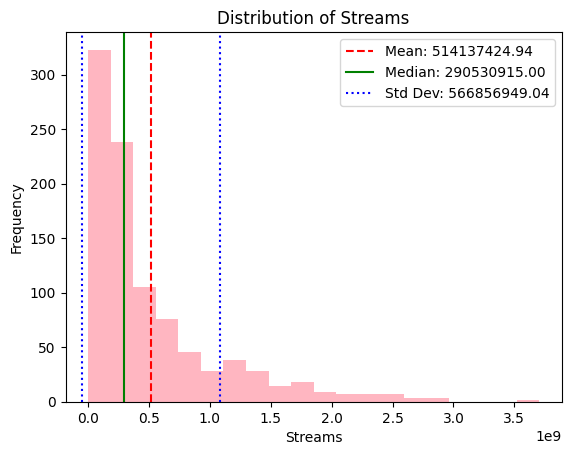

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify-2023.csv', encoding='latin-1')

# Convert the 'streams' column to numeric, handling errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Calculate the mean, median, and standard deviation of the 'streams' column
streams_mean = df['streams'].mean()
streams_median = df['streams'].median()
streams_std = df['streams'].std()

# Create a histogram of the 'streams' column with a light pink color
plt.hist(df['streams'], bins=20, color='lightpink')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.title('Distribution of Streams')

# Add vertical lines for the mean, median, and standard deviation
plt.axvline(streams_mean, color='r', linestyle='--', label=f'Mean: {streams_mean:.2f}')
plt.axvline(streams_median, color='g', linestyle='-', label=f'Median: {streams_median:.2f}')
plt.axvline(streams_mean + streams_std, color='b', linestyle=':', label=f'Std Dev: {streams_std:.2f}')
plt.axvline(streams_mean - streams_std, color='b', linestyle=':')

plt.legend()
plt.show()

*    What is the distribution of released_year and artist_count? Are there any noticeable trends
or outliers?

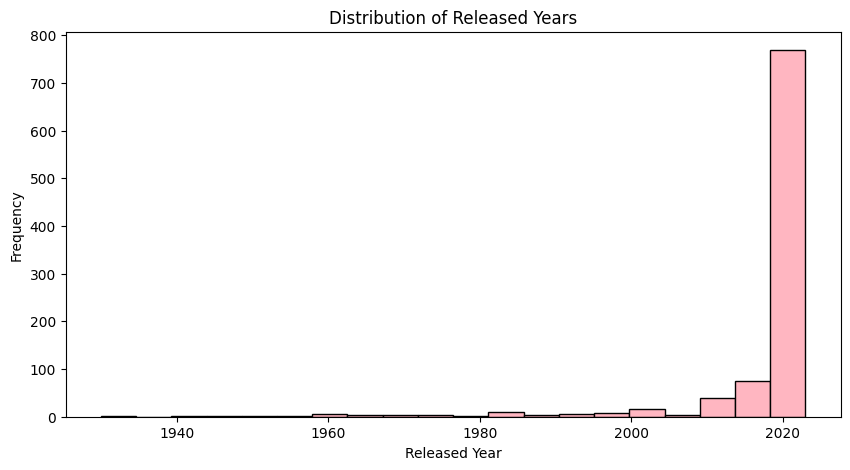

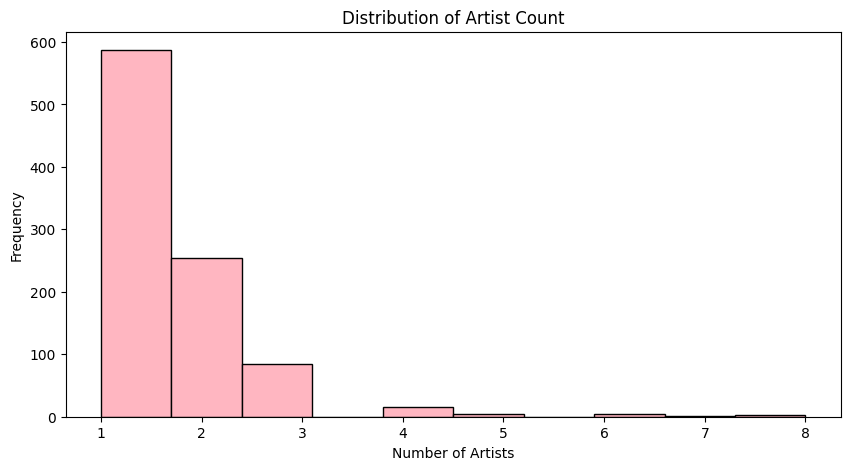

Descriptive statistics for Released Year:


,Released Year
count,953.000000
mean,2018.238195
std,11.116218
min,1930.000000
25%,2020.000000
50%,2022.000000
75%,2022.000000
max,2023.000000



Descriptive statistics for Artist Count:


,Artist Count
count,953.000000
mean,1.555089
std,0.887209
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,8.000000



Outliers for Released Year:


,Track Name,Artist(s) Name,Released Year
22,I Wanna Be Yours,Arctic Monkeys,2013
37,Blank Space,Taylor Swift,2014
38,Style,Taylor Swift,2014
47,Die For You,The Weeknd,2016
48,Starboy,"The Weeknd, Daft Punk",2016
54,Another Love,Tom Odell,2012
65,Yellow,Chris Molitor,1999
73,Sweater Weather,The Neighbourhood,2012
75,Viva La Vida,Coldplay,2008
80,Riptide,Vance Joy,1975



Outliers for Artist Count:


,Track Name,Artist(s) Name,Artist Count
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK, Rusherking, Emilia, Tiago pzk",8
135,"Calling (Spider-Man: Across the Spider-Verse) (Metro Boomin & Swae Lee, NAV, feat. A Boogie Wit da Hoodie)","Swae Lee, A Boogie Wit da Hoodie, Metro Boomin, NAV",4
137,"Tere Vaaste (From ""Zara Hatke Zara Bachke"")","Sachin-Jigar, Shadab Faridi, Altamash Faridi, Amitabh Bhattacharya, Varun Jain",5
141,Novo Balanï¿½,"Veigh, Bvga Beatz, Supernova Ent, Prod Malax",4
197,POLARIS - Remix,"Feid, Mora, Saiko, Quevedo",4
200,"Annihilate (Spider-Man: Across the Spider-Verse) (Metro Boomin & Swae Lee, Lil Wayne, Offset)","Swae Lee, Lil Wayne, Offset, Metro Boomin",4
201,"Angel Pt 1 (feat. Jimin of BTS, JVKE & Muni Long)","Kodak Black, NLE Choppa, Muni Long, JVKE, Jimin",5
238,"Link Up (Metro Boomin & Don Toliver, Wizkid feat. BEAM & Toian) - Spider-Verse Remix (Spider-Man: Across the Spider-Verse )","WizKid, Toian, Metro Boomin, Don Toliver, Beam",5
328,Marisola - Remix,"Duki, NICKI NICOLE, Cris Mj, Standly, Stars Music Chile",5
365,Enemy (with JID) - from the series Arcane League of Legends,"Imagine Dragons, League of Legends, JID, Arcane",4


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify-2023.csv', encoding='latin-1')

# --- Released Year Distribution ---
plt.figure(figsize=(10, 5))
plt.hist(df['released_year'], bins=20, color='lightpink', edgecolor='black')  # Changed to light pink
plt.xlabel('Released Year')
plt.ylabel('Frequency')
plt.title('Distribution of Released Years')
plt.show()

# --- Artist Count Distribution ---
# Create artist_count column if it doesn't exist
df['artist_count'] = df['artist(s)_name'].str.split(',').apply(len)

plt.figure(figsize=(10, 5))
plt.hist(df['artist_count'], bins=10, color='lightpink', edgecolor='black')
plt.xlabel('Number of Artists')
plt.ylabel('Frequency')
plt.title('Distribution of Artist Count')
plt.show()

# --- Trends and Outliers ---
# Descriptive statistics for Released Year
released_year_stats = df['released_year'].describe()
print("Descriptive statistics for Released Year:")
released_year_stats_df = released_year_stats.to_frame().rename(columns={released_year_stats.name: 'Released Year'})
display(released_year_stats_df.style
        .set_properties(**{'background-color': 'lightpink', 'color': 'black'})
        .set_table_attributes('style="border-collapse:collapse;"')
        .set_table_styles([{
            'selector': 'th',
            'props': [('border', '1px solid black')]
        }, {
            'selector': 'td',
            'props': [('border', '1px solid black')]
        }]))

# Descriptive statistics for Artist Count
artist_count_stats = df['artist_count'].describe()
print("\nDescriptive statistics for Artist Count:")
artist_count_stats_df = artist_count_stats.to_frame().rename(columns={artist_count_stats.name: 'Artist Count'})
display(artist_count_stats_df.style
        .set_properties(**{'background-color': 'lightpink', 'color': 'black'})
        .set_table_attributes('style="border-collapse:collapse;"')
        .set_table_styles([{
            'selector': 'th',
            'props': [('border', '1px solid black')]
        }, {
            'selector': 'td',
            'props': [('border', '1px solid black')]
        }]))

# Outlier detection for released year (using IQR)
Q1 = df['released_year'].quantile(0.25)
Q3 = df['released_year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_year = df[(df['released_year'] < lower_bound) | (df['released_year'] > upper_bound)]

print(f"\nOutliers for Released Year:")
if not outliers_year.empty:
    outliers_year_df = outliers_year[['track_name', 'artist(s)_name', 'released_year']].rename(columns={
        'track_name': 'Track Name',
        'artist(s)_name': 'Artist(s) Name',
        'released_year': 'Released Year'
    })
    display(outliers_year_df.style
            .set_properties(**{'background-color': 'lightpink', 'color': 'black'})
            .set_table_attributes('style="border-collapse:collapse;"')
            .set_table_styles([{
                'selector': 'th',
                'props': [('border', '1px solid black')]
            }, {
                'selector': 'td',
                'props': [('border', '1px solid black')]
            }]))
else:
    print("No outliers found for Released Year.")

# Outlier detection for artist count (using IQR)
Q1 = df['artist_count'].quantile(0.25)
Q3 = df['artist_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_count = df[(df['artist_count'] < lower_bound) | (df['artist_count'] > upper_bound)]

print(f"\nOutliers for Artist Count:")
if not outliers_count.empty:
    outliers_count_df = outliers_count[['track_name', 'artist(s)_name', 'artist_count']].rename(columns={
        'track_name': 'Track Name',
        'artist(s)_name': 'Artist(s) Name',
        'artist_count': 'Artist Count'
    })
    display(outliers_count_df.style
            .set_properties(**{'background-color': 'lightpink', 'color': 'black'})
            .set_table_attributes('style="border-collapse:collapse;"')
            .set_table_styles([{
                'selector': 'th',
                'props': [('border', '1px solid black')]
            }, {
                'selector': 'td',
                'props': [('border', '1px solid black')]
            }]))
else:
    print("No outliers found for Artist Count.")


# **3. Top Performers**



*   Which track has the highest number of streams? Display the top 5 most streamed tracks




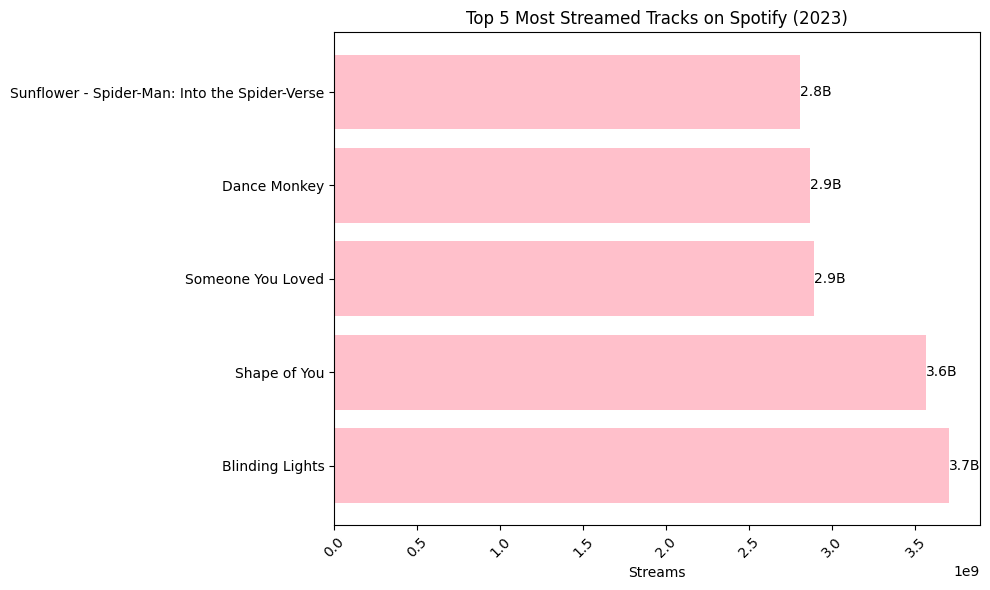

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify-2023.csv', encoding='latin-1')

# Convert the 'streams' column to numeric, handling errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Function to format stream count
def format_streams(streams):
    if streams >= 1e9:
        return f"{streams/1e9:.1f}B"
    elif streams >= 1e6:
        return f"{streams/1e6:.1f}M"
    else:
        return f"{streams:,.0f}"

# Apply the formatting to the streams column
df['formatted_streams'] = df['streams'].apply(format_streams)

# Sort the DataFrame by streams in descending order
df_sorted = df.sort_values(by='streams', ascending=False)

# Get the top 5 most streamed tracks
top_5_tracks = df_sorted[['track_name', 'artist(s)_name', 'streams']].head(5)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_5_tracks['track_name'], top_5_tracks['streams'], color='pink')
plt.xlabel('Streams')
plt.title('Top 5 Most Streamed Tracks on Spotify (2023)')
plt.xticks(rotation=45)

# Display the formatted stream count on the bars
for index, value in enumerate(top_5_tracks['streams']):
    plt.text(value, index, format_streams(value), va='center')

plt.tight_layout()
plt.show()




*   Who are the top 5 most frequent artists based on the number of tracks in the dataset?




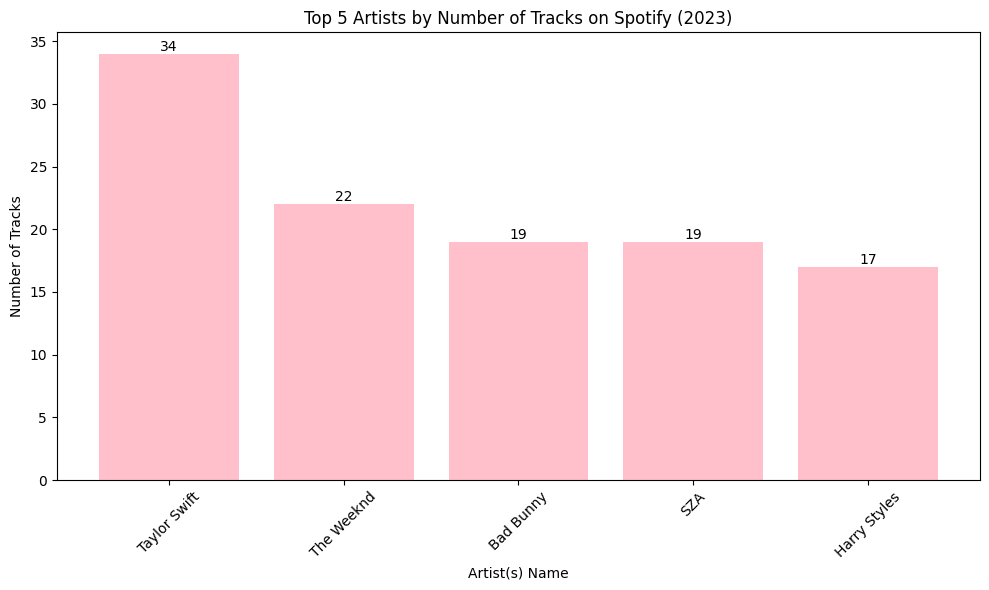

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify-2023.csv', encoding='latin-1')

# Calculate the frequency of each artist
artist_counts = df['artist(s)_name'].value_counts().head(5)

# Create a DataFrame from the results
top_5_artists = artist_counts.to_frame().reset_index()
top_5_artists.columns = ['artist(s)_name', 'Number of Tracks']

# Add a ranking column starting from 1
top_5_artists['Rank'] = range(1, len(top_5_artists) + 1)

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_artists['artist(s)_name'], top_5_artists['Number of Tracks'], color='pink')
plt.xlabel('Artist(s) Name')
plt.ylabel('Number of Tracks')
plt.title('Top 5 Artists by Number of Tracks on Spotify (2023)')
plt.xticks(rotation=45)

# Add the values on top of the bars
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Add text

# Display the graph
plt.tight_layout()
plt.show()


# 4. Temporal Trends




* Analyze the trends in the number of tracks released over time. Plot the number of tracks
released per year.





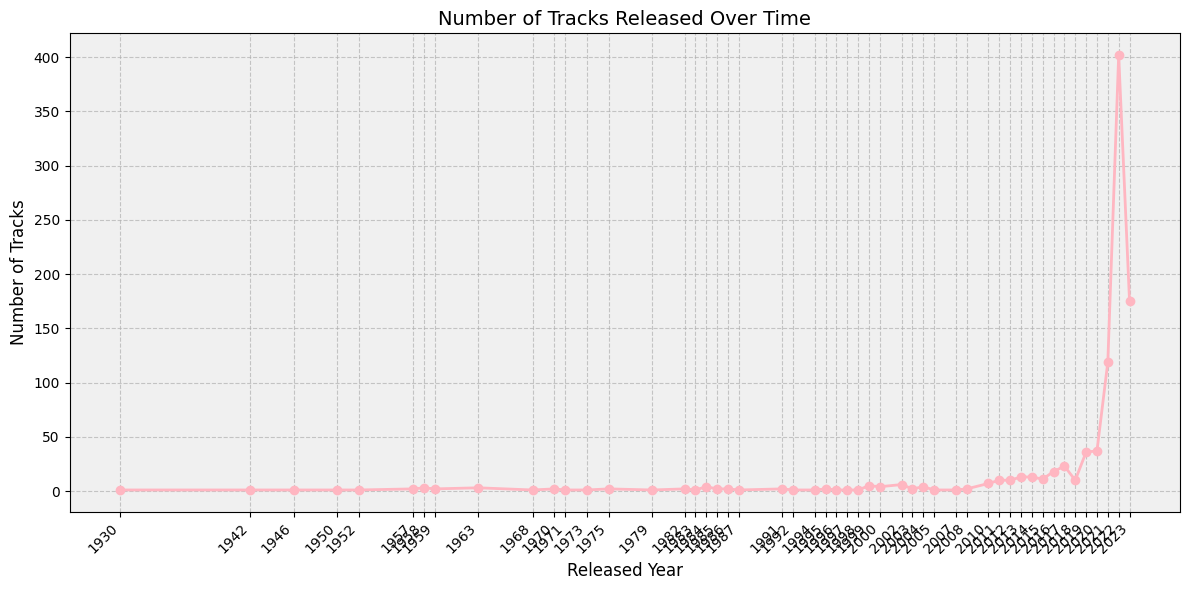

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify-2023.csv', encoding='latin-1')

# Count the number of tracks released per year
tracks_per_year = df['released_year'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(tracks_per_year.index, tracks_per_year.values, marker='o', linestyle='-', color='lightpink', linewidth=2)

# Customize plot appearance
plt.xlabel('Released Year', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.title('Number of Tracks Released Over Time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(tracks_per_year.index, rotation=45, ha='right', fontsize=10)  # Show all years

# Add a background color
plt.gca().set_facecolor('#f0f0f0')

plt.tight_layout()
plt.show()



*   Does the number of tracks released per month follow any noticeable patterns? Which
month sees the most releases?





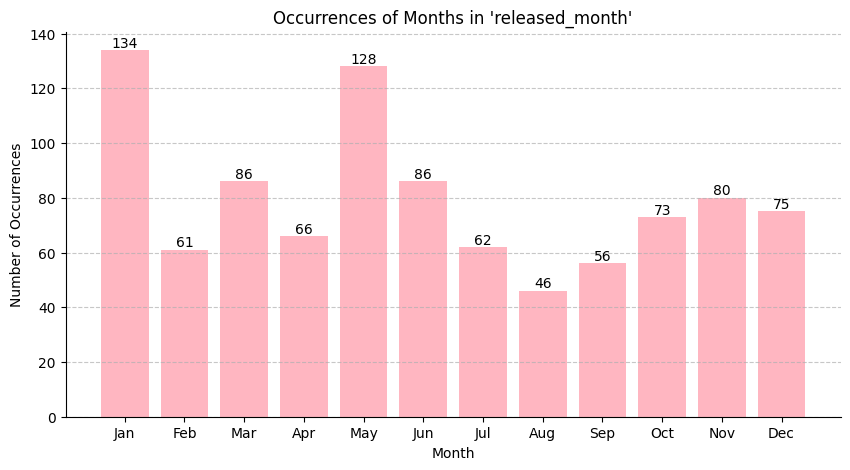

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify-2023.csv', encoding='latin-1')

# Count occurrences of each month value in 'released_month'
month_counts = df['released_month'].value_counts().sort_index()

# Ensure all months from 1 to 12 are included
month_counts = month_counts.reindex(range(1, 13), fill_value=0)

# Create a bar graph with value labels
plt.figure(figsize=(10, 5))
bars = plt.bar(month_counts.index, month_counts.values, color='lightpink')

# Set x-axis labels to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Number of Occurrences")
plt.title("Occurrences of Months in 'released_month'")

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(int(height)), ha='center', va='bottom')

# Show the plot
plt.show()

# 5. Genre and Music Characteristics



*  Examine the correlation between streams and musical attributes like bpm, danceability_%,
and energy_%. Which attributes seem to influence streams the most?





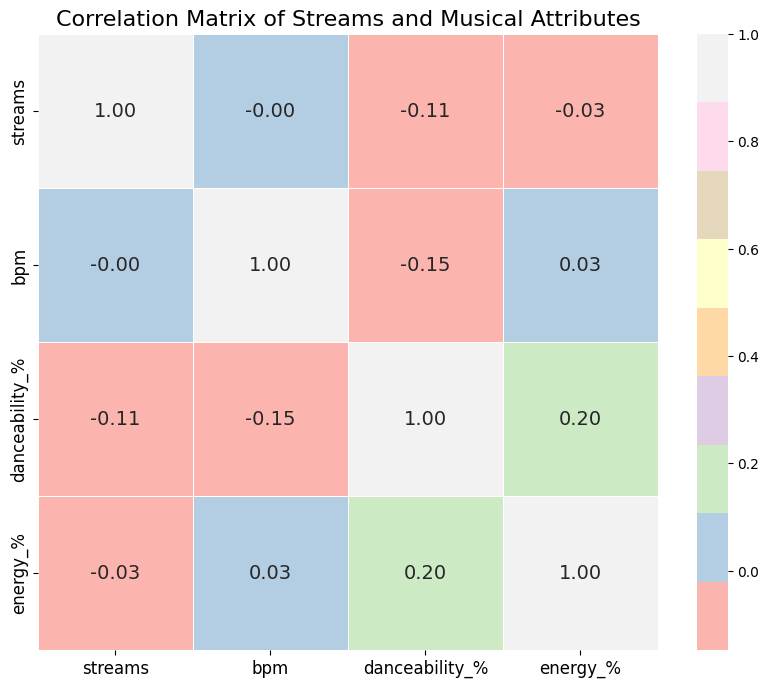


Attribute(s) with the strongest influence on streams:


,Attribute,Correlation with Streams
0,danceability_%,-0.105457


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify-2023.csv', encoding='latin-1')

# Convert 'streams' column to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Select relevant columns for correlation analysis
attributes = ['bpm', 'danceability_%', 'energy_%']
df_corr = df[['streams'] + attributes].dropna()

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Create a heatmap with a light pink color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Pastel1', fmt=".2f", linewidths=.5, annot_kws={"size": 14})
plt.title('Correlation Matrix of Streams and Musical Attributes', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Identify attributes with highest correlation to streams
corr_with_streams = corr_matrix['streams'].drop('streams')
most_influential = corr_with_streams[abs(corr_with_streams) == abs(corr_with_streams).max()]

# Create a DataFrame for the most influential attributes
most_influential_df = most_influential.reset_index()
most_influential_df.columns = ['Attribute', 'Correlation with Streams']

# Display the most influential attributes in a light pink table
print("\nAttribute(s) with the strongest influence on streams:")
display(most_influential_df.style
        .set_properties(**{'background-color': 'lightpink', 'color': 'black'})
        .set_table_attributes('style="border-collapse:collapse; border: 1px solid black;"')
        .set_table_styles([{
            'selector': 'th',
            'props': [('border', '1px solid black')]
        }, {
            'selector': 'td',
            'props': [('border', '1px solid black')]
        }]))




*   Is there a correlation between danceability_% and energy_%? How about valence_% and
acousticness_%?




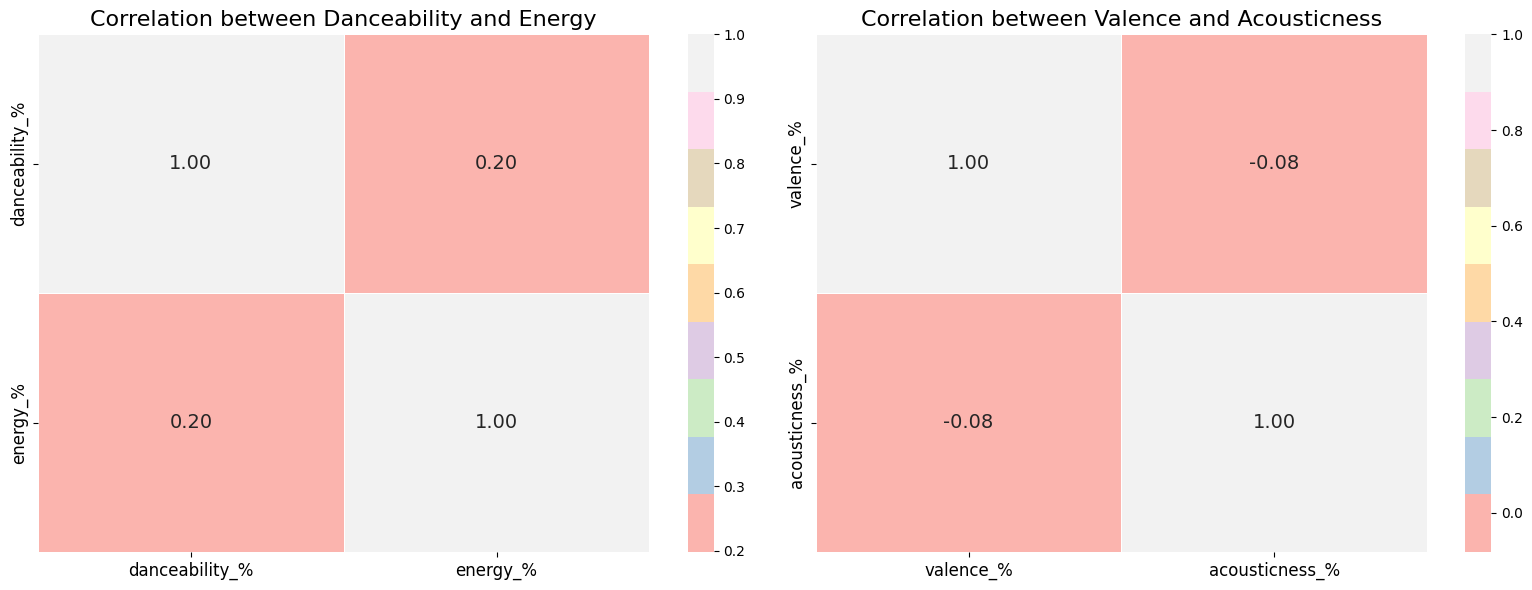

,Correlation Attribute Pair,Correlation Value
0,Danceability & Energy,0.198095
1,Valence & Acousticness,-0.081907


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify-2023.csv', encoding='latin-1')

# Select relevant columns for correlation analysis
attributes1 = ['danceability_%', 'energy_%']
attributes2 = ['valence_%', 'acousticness_%']

# Calculate correlation matrices
corr_matrix1 = df[attributes1].corr()
corr_matrix2 = df[attributes2].corr()

# Create heatmaps with light pink color scheme
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_matrix1, annot=True, cmap='Pastel1', fmt=".2f", linewidths=.5, annot_kws={"size": 14}, ax=axes[0])  # Changed color scheme to light pink
axes[0].set_title('Correlation between Danceability and Energy', fontsize=16)
axes[0].tick_params(labelsize=12)

sns.heatmap(corr_matrix2, annot=True, cmap='Pastel1', fmt=".2f", linewidths=.5, annot_kws={"size": 14}, ax=axes[1])  # Changed color scheme to light pink
axes[1].set_title('Correlation between Valence and Acousticness', fontsize=16)
axes[1].tick_params(labelsize=12)

plt.tight_layout()
plt.show()

# Create a DataFrame for the correlation values
correlation_values = {
    'Correlation Attribute Pair': ['Danceability & Energy', 'Valence & Acousticness'],
    'Correlation Value': [corr_matrix1.iloc[0, 1], corr_matrix2.iloc[0, 1]]
}
correlation_df = pd.DataFrame(correlation_values)

# Display the styled DataFrame in Jupyter Notebook
correlation_table = correlation_df.style.set_properties(**{'background-color': 'lightpink', 'color': 'black'}).set_table_attributes('style="border-collapse:collapse; border: 1px solid black;"').set_table_styles([{
    'selector': 'th',
    'props': [('border', '1px solid black')]
}, {
    'selector': 'td',
    'props': [('border', '1px solid black')]
}])

correlation_table  # This will display the styled table in Jupyter Notebook


# 6. Platform Popularity



*   How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists
compare? Which platform seems to favor the most popular tracks?





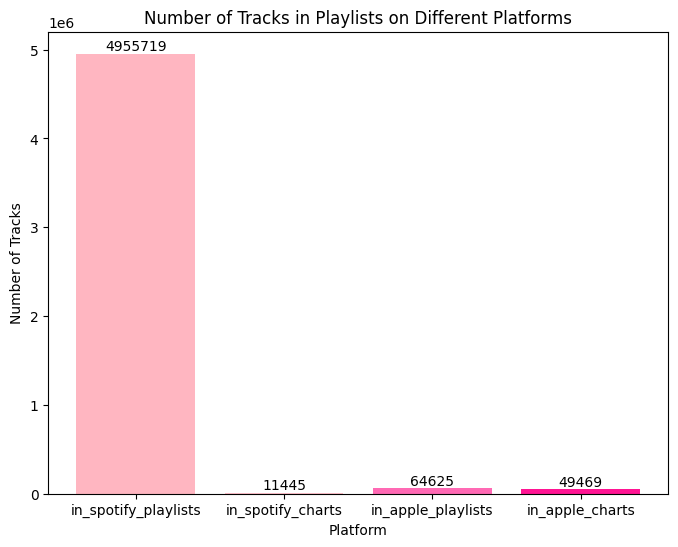

,Platform,Number of Tracks
0,In Spotify Playlists,4955719



In Spotify Playlists seems to favor the most popular tracks.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/spotify-2023.csv', encoding='latin-1')

# Count tracks in each platform's playlists
platform_counts = df[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts']].sum()

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(platform_counts.index, platform_counts.values, color=['lightpink', 'pink', 'hotpink', 'deeppink'])
plt.xlabel("Platform")
plt.ylabel("Number of Tracks")
plt.title("Number of Tracks in Playlists on Different Platforms")

# Add value labels above each bar
for i, v in enumerate(platform_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Identify the platform with the most popular tracks
most_popular_platform = platform_counts.idxmax()
most_popular_count = platform_counts.max()

# Create a DataFrame for the most popular platform
popular_platform_df = pd.DataFrame({
    'Platform': [most_popular_platform.replace('_', ' ').title()],
    'Number of Tracks': [most_popular_count]
})

# Display the styled DataFrame in a light pink table
styled_table = popular_platform_df.style.set_properties(**{'background-color': 'lightpink', 'color': 'black'}) \
                                        .set_table_attributes('style="border-collapse:collapse; border: 1px solid black;"') \
                                        .set_table_styles([{
                                            'selector': 'th',
                                            'props': [('border', '1px solid black')]
                                        }, {
                                            'selector': 'td',
                                            'props': [('border', '1px solid black')]
                                        }])

# Display the table in a Jupyter Notebook
display(styled_table)  # Use display() for Jupyter Notebook

# Print the message about the most popular platform
print(f"\n{most_popular_platform.replace('_', ' ').title()} seems to favor the most popular tracks.")


# 7. Advanced Analysis




*   Based on the streams data, can you identify any patterns among tracks with the same key
or mode (Major vs. Minor)?




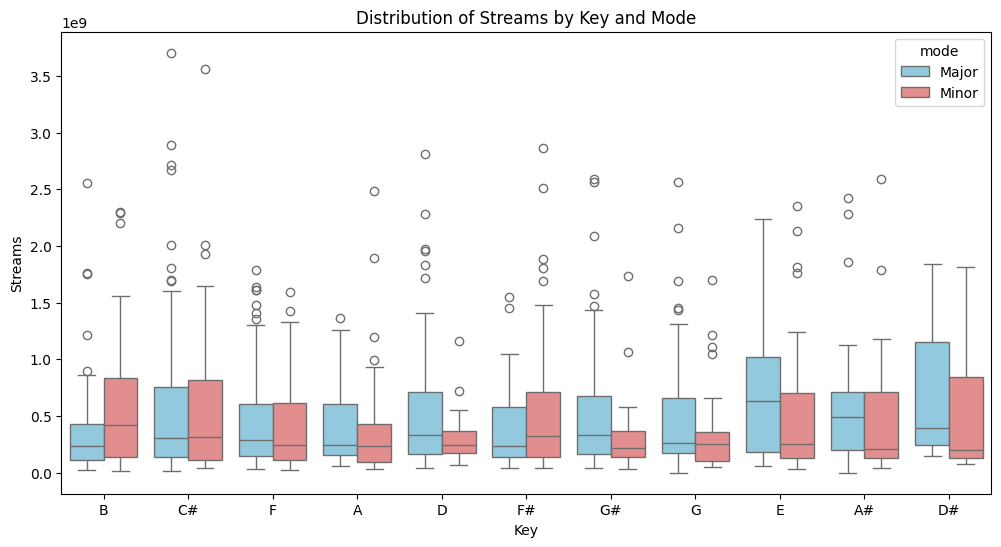

,Key Mode,Average Streams
0,Major,534832793.335155
1,Minor,485944478.910670


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load the dataset
df = pd.read_csv('/spotify-2023.csv', encoding='latin-1')

# Convert 'streams' column to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Group data by key and mode and calculate average streams
key_mode_streams = df.groupby(['key', 'mode'])['streams'].mean().reset_index()

# Create a box plot for streams by key
plt.figure(figsize=(12, 6))
sns.boxplot(x='key', y='streams', data=df, hue='mode', palette={'Major': 'skyblue', 'Minor': 'lightcoral'})
plt.title('Distribution of Streams by Key and Mode')
plt.xlabel('Key')
plt.ylabel('Streams')
plt.show()

# Calculate average streams for major and minor keys
major_streams = df[df['mode'] == 'Major']['streams'].mean()
minor_streams = df[df['mode'] == 'Minor']['streams'].mean()

# Create a DataFrame for the average streams
average_streams_df = pd.DataFrame({
    'Key Mode': ['Major', 'Minor'],
    'Average Streams': [major_streams, minor_streams]
})

# Display the styled DataFrame in a light pink table
styled_table = average_streams_df.style.set_properties(**{'background-color': 'lightpink', 'color': 'black'}) \
                                        .set_table_attributes('style="border-collapse:collapse; border: 1px solid black;"') \
                                        .set_table_styles([{
                                            'selector': 'th',
                                            'props': [('border', '1px solid black')]
                                        }, {
                                            'selector': 'td',
                                            'props': [('border', '1px solid black')]
                                        }])

# Display the table in a Jupyter Notebook
display(styled_table)  # Use display() for Jupyter Notebook




*   Do certain genres or artists consistently appear in more playlists or charts? Perform an
analysis to compare the most frequently appearing artists in playlists or charts.




Most frequently appearing artists in playlists and charts:



,Artist,Number of Playlists/Charts
0,The Weeknd,147258
1,Taylor Swift,137178
2,Ed Sheeran,130788
3,Harry Styles,112497
4,Kendrick Lamar,59772
5,Bad Bunny,53026
6,SZA,46399
7,BTS,19409
8,Feid,14956
9,Morgan Wallen,9706


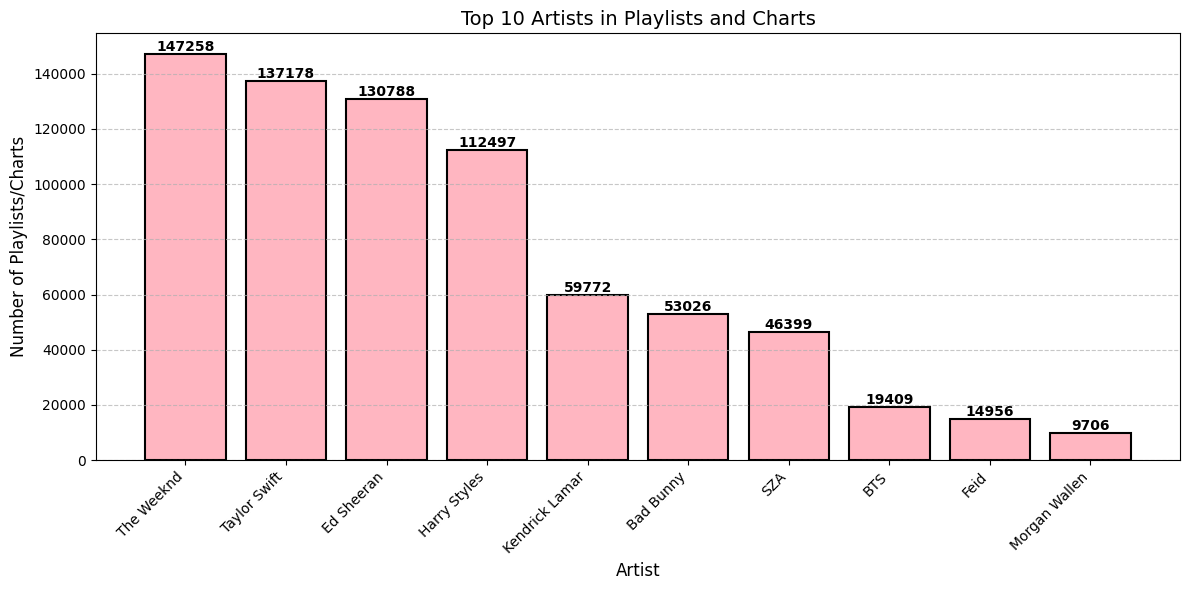

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load the dataset
df = pd.read_csv('/spotify-2023.csv', encoding='latin-1')

# Combine playlist and chart columns for overall presence
df['all_playlists'] = df['in_spotify_playlists'] + df['in_spotify_charts'] + df['in_apple_playlists'] + df['in_apple_charts']

# Get top 10 artists overall
top_10_artists = df['artist(s)_name'].value_counts().head(10).index

# Filter dataframe for top 10 artists
df_top_artists = df[df['artist(s)_name'].isin(top_10_artists)]

# Count playlist occurrences for each artist
playlist_counts = df_top_artists.groupby('artist(s)_name')['all_playlists'].sum().sort_values(ascending=False)

# Print the results
print("Most frequently appearing artists in playlists and charts:\n")

# Create a DataFrame for displaying in a table
artist_table = pd.DataFrame(playlist_counts).reset_index()
artist_table.columns = ['Artist', 'Number of Playlists/Charts']

# Display the styled DataFrame in a light pink table
styled_table = artist_table.style.set_properties(**{'background-color': 'lightpink', 'color': 'black'}) \
                                   .set_table_attributes('style="border-collapse:collapse; border: 1px solid black;"') \
                                   .set_table_styles([{
                                       'selector': 'th',
                                       'props': [('border', '1px solid black')]
                                   }, {
                                       'selector': 'td',
                                       'props': [('border', '1px solid black')]
                                   }])

display(styled_table)  # Display the table in Jupyter Notebook

# Create a bar chart with enhanced design
plt.figure(figsize=(12, 6))
bars = plt.bar(playlist_counts.index, playlist_counts.values, color='lightpink', edgecolor='black', linewidth=1.5)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Number of Playlists/Charts", fontsize=12)
plt.title("Top 10 Artists in Playlists and Charts", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


# **Guide Questions:**

1. Overview of Dataset

* The dataset contains **935 rows** and **24 columns**. Additionally, there are missing values in the following columns: **in shazam charts and key.**

2. Basic Descriptive Statistics

* The distribution of the released year variable is skewed to the right, showing that most tracks were released in recent years. This trend indicates a steady rise in music releases over time, suggesting an increase in new music. However, the dataset also includes some outliers, which are songs released much earlier than most and may be older classics or re-releases.
3. Top Performers

* The track with the highest number of streams is **"Blinding lights by The Weekend”**. the top 5 most frequent artists in the dataset are **Taylor Swift, The Weekend, Bad Bunny, Sza and Harry Styles.**
4. Temporal Trends

* The number of tracks released each year has mostly gone up over time, although there are some ups and downs in certain years, especially between **2020** and **2023**. In recent years, there's been a more noticeable rise in releases. The monthly release pattern shows some cycles, with January typically having the most releases, while August and September usually have the fewest. There’s often a slight drop in releases during the holidays in December, followed by a gradual increase as summer approaches.
5. Genre and Music Characteristics

* There is a moderate positive correlation between **danceability and energy**, meaning that tracks that are more danceable often have higher energy levels. This makes sense, as danceable music usually feels more energetic. On the other hand, there is a weak negative correlation between **valence and acousticness**. This means that tracks with a higher positive mood (valence) tend to have lower acoustic elements. This aligns with the common idea that acoustic music is often more mellow or relaxed.
6. Platform Popularity

* The analysis shows that **Spotify Playlists** tend to favor the most popular tracks, as they include the highest number of songs from the dataset, indicating a preference for popular and trending music.
7. Advanced Analysis

* While major keys may have a slight edge in stream counts, the overall pattern isn’t very clear. Key and mode by themselves may not be strong indicators of streaming success. However, some artists consistently show up in more playlists and charts, which likely reflects their popularity in the music scene.
